In [1]:
#Fred Kalash
#fk227

In [2]:
#Problem 1

In [6]:
#a

In [7]:
from skimage.io import imread, imshow
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor


np.random.seed(1)

In [8]:
#1a mona lisa
original = imread('687px-Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg')
original.shape

(1024, 687, 3)

In [9]:
#b

In [13]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

grayscale = rgb2gray(original)

In [14]:
y = []
X = []

for j in range(grayscale.shape[0]):
    for k in range(grayscale.shape[1]):
        X.append([j,k])
        y.append(grayscale[j,k])
        
# sample 5000 points
rs = np.random.randint(0, high=(len(y)-1),
                       size=5000, dtype=int)

In [15]:
y_sampled = []
X_sampled = []
for val in rs:
    y_sampled.append(y[val])
    X_sampled.append(X[val])

print(len(y_sampled))

5000


In [16]:
"""
What other preprocessing steps are necessary for random forests inputs? Describe them,
implement them, and justify your decisions. In particular, do you need to perform mean
subtraction, standardization, or unit-normalization?

RF do not require any preprocessing of inputs compared to OLS/NN.
I can create additional features to help the RF process though.
I don't do any mean subtraction, standardization, or unit-normalization.
"""

"\nWhat other preprocessing steps are necessary for random forests inputs? Describe them,\nimplement them, and justify your decisions. In particular, do you need to perform mean\nsubtraction, standardization, or unit-normalization?\n\nRF do not require any preprocessing of inputs compared to OLS/NN.\nI can create additional features to help the RF process though.\nI don't do any mean subtraction, standardization, or unit-normalization.\n"

In [17]:
pd.Series(y_sampled).describe()

count    5000.000000
mean        0.289489
std         0.204816
min         0.004524
25%         0.110338
50%         0.245684
75%         0.453283
max         0.918377
dtype: float64

In [18]:
regr = RandomForestRegressor(random_state=0, n_jobs=6)
regr.fit(X_sampled, y_sampled)
print('done')

done


In [19]:
preds = regr.predict(X)

In [20]:
#c

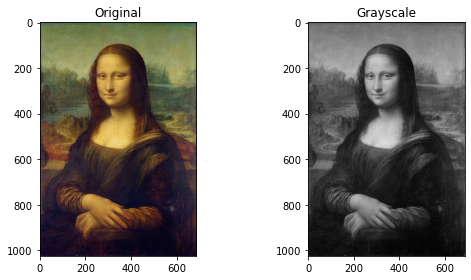

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

In [22]:
"""
What other preprocessing steps are necessary for random regression forest outputs? Describe
them, implement them, and justify your decisions.

I use grayscale for simplicity in terms of doing the questions after this one like upper / lower bounds.
"""

'\nWhat other preprocessing steps are necessary for random regression forest outputs? Describe\nthem, implement them, and justify your decisions.\n\nI use grayscale for simplicity in terms of doing the questions after this one like upper / lower bounds.\n'

In [23]:
#d

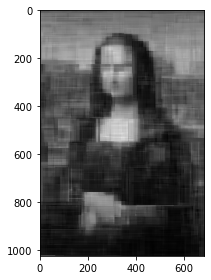

In [24]:
imshow(preds.reshape(original.shape[0],original.shape[1]), cmap='gray')

In [25]:
# loop won't show so do these separately
#for depth in [1,2,3,5,10,15]:

def get_rf_depth(depth):
    regr = RandomForestRegressor(n_estimators=1, max_depth=depth,
                                 random_state=0, n_jobs=6)
    regr.fit(X_sampled, y_sampled)
    preds = regr.predict(X)
    u_vals = pd.Series(preds).nunique()
    imshow(preds.reshape(original.shape[0],original.shape[1]), cmap='gray')
    print(u_vals)

2


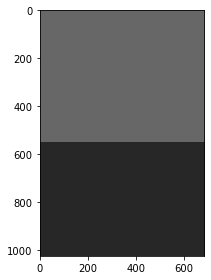

In [26]:
# depth 1 has 2 colors only
get_rf_depth(1)

4


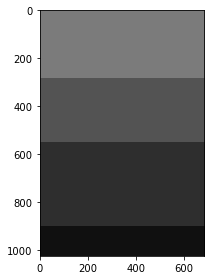

In [27]:
# depth 2 has 4 colors only
get_rf_depth(2)

8


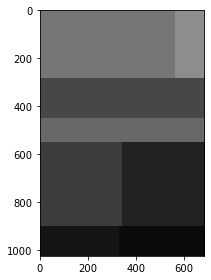

In [28]:
# depth 3 has 8 colors. 2**depth
get_rf_depth(3)

32


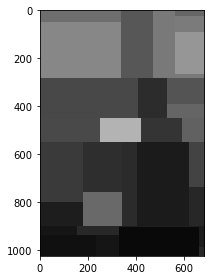

In [29]:
get_rf_depth(5)

In [30]:
2**5

32

680


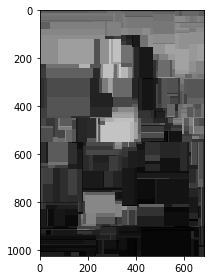

In [31]:
get_rf_depth(10)

2986


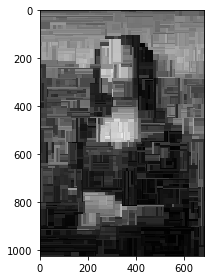

In [32]:
get_rf_depth(100)

In [35]:
#e-i

In [36]:
"""
The number of possible colors is equal to 2**depth_val
This is because we are using binary trees that split on a single feature val. 
We are counting the leaves in a binary tree
"""

'\nThe number of possible colors is equal to 2**depth_val\nThis is because we are using binary trees that split on a single feature val. \nWe are counting the leaves in a binary tree\n'

In [37]:
def get_rf7_tree(trees):
    regr = RandomForestRegressor(n_estimators=trees, max_depth=7,
                                 random_state=0, n_jobs=6)
    regr.fit(X_sampled, y_sampled)
    preds = regr.predict(X)
    u_vals = pd.Series(preds).nunique()
    r_vals = pd.Series(preds).round(2).nunique()
    imshow(preds.reshape(original.shape[0],original.shape[1]), cmap='gray')
    print(u_vals)
    print(r_vals)

In [38]:
#e-ii

In [39]:
"""
The number of trees makes the image more blurry by increasing the number of unique values but having 
each value be averaged across the number of trees. 
As you can see the rounded values do not increase as much as the number of unique raw values.
"""

'\nThe number of trees makes the image more blurry by increasing the number of unique values but having \neach value be averaged across the number of trees. \nAs you can see the rounded values do not increase as much as the number of unique raw values.\n'

126
55


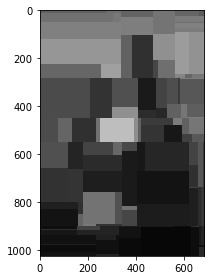

In [40]:
get_rf7_tree(1)

In [41]:
#0.5*(128)*(128+1)

958
69


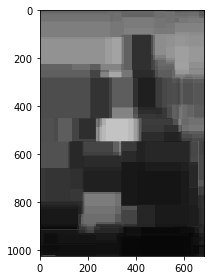

In [42]:
get_rf7_tree(3)

2073
69


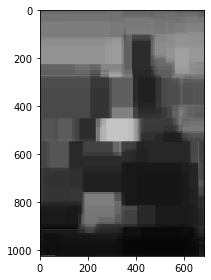

In [43]:
get_rf7_tree(5)

5508
75


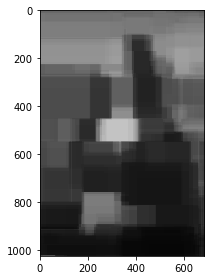

In [44]:
get_rf7_tree(10)

64964
74


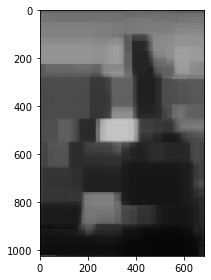

In [45]:
get_rf7_tree(100)

In [46]:
#e-iii

4578


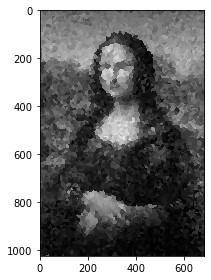

In [47]:
knn = KNeighborsRegressor(n_neighbors=1, n_jobs=6)
knn.fit(X_sampled,y_sampled)
preds = knn.predict(X)
u_vals = pd.Series(preds).nunique()
imshow(preds.reshape(original.shape[0],original.shape[1]), cmap='gray')
print(u_vals)

In [48]:
"""
It looks patchy because it depends on the 5000 samples from the original image.
It would be perfect if it sampled all pixels of the original image.
It is less blurry compared to the RF with many trees and low depth. 
You have almost as many unique values 4578 as the 5000 samples.
"""

'\nIt looks patchy because it depends on the 5000 samples from the original image.\nIt would be perfect if it sampled all pixels of the original image.\nIt is less blurry compared to the RF with many trees and low depth. \nYou have almost as many unique values 4578 as the 5000 samples.\n'

In [49]:
#e-iv

In [50]:
"""
I try to show images by min_samples_leaf > 1 which will blur the image as min increases
"""

'\nI try to show images by min_samples_leaf > 1 which will blur the image as min increases\n'

2986


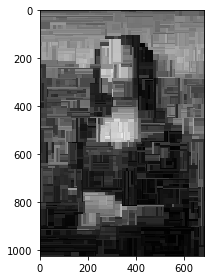

In [54]:
def get_min_rf(min_val):
    regr = RandomForestRegressor(n_estimators=1, max_depth=100,
                                 min_samples_leaf = min_val,
                                 random_state=0, n_jobs=6)
    regr.fit(X_sampled, y_sampled)
    preds = regr.predict(X)
    u_vals = pd.Series(preds).nunique()
    imshow(preds.reshape(original.shape[0],original.shape[1]), cmap='gray')
    print(u_vals)
    
get_min_rf(1)

248


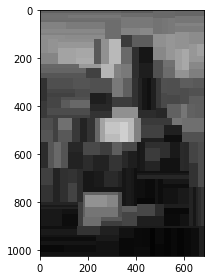

In [55]:
get_min_rf(10)

25


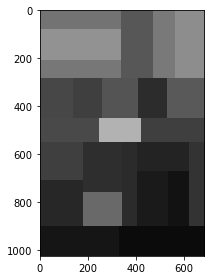

In [56]:
get_min_rf(100)

In [57]:
#f-i

[Text(167.4, 181.2, 'X[0] <= 550.5\nsquared_error = 0.042\nsamples = 3146\nvalue = 0.286'),
 Text(83.7, 108.72, 'X[0] <= 280.5\nsquared_error = 0.035\nsamples = 1681\nvalue = 0.404'),
 Text(41.85, 36.23999999999998, 'squared_error = 0.022\nsamples = 839\nvalue = 0.483'),
 Text(125.55000000000001, 36.23999999999998, 'squared_error = 0.037\nsamples = 842\nvalue = 0.325'),
 Text(251.10000000000002, 108.72, 'X[0] <= 900.5\nsquared_error = 0.017\nsamples = 1465\nvalue = 0.153'),
 Text(209.25, 36.23999999999998, 'squared_error = 0.018\nsamples = 1108\nvalue = 0.183'),
 Text(292.95, 36.23999999999998, 'squared_error = 0.003\nsamples = 357\nvalue = 0.064')]

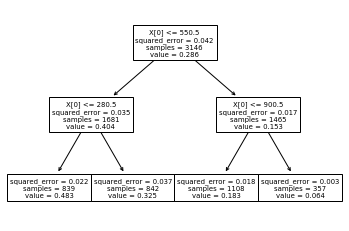

In [58]:
from sklearn import tree

regr = RandomForestRegressor(n_estimators=1, max_depth=2,
                                 random_state=0, n_jobs=6)
regr.fit(X_sampled, y_sampled)

single_tree = regr.estimators_[0]

tree.plot_tree(single_tree)

In [59]:
#f-ii

In [60]:
"""
Patches are rectangles because we are using binary trees. 
Patches of color depend on the leaf node, or averages of multiple leaf codes.
Patches are arranged based upon our splitting strategy and target values
"""

'\nPatches are rectangles because we are using binary trees. \nPatches of color depend on the leaf node, or averages of multiple leaf codes.\nPatches are arranged based upon our splitting strategy and target values\n'

In [61]:
#f-iii

In [62]:
"""
Upper bound is 2**depth as shown in the first question empirically.
"""

'\nUpper bound is 2**depth as shown in the first question empirically.\n'

In [63]:
#f-iv

In [64]:
"""
The unique colors depends on how the splits are constructed per tree, and the number of unique colors in these splits.
It is tricky because the splits per tree are in general different. 

If the set has n elements, the number of k-combinations
Let n be equal to 2**depth from iii. 
And k is the number of decision trees in the forest. 
Assume worst case so averages and targets make so that each average is unique. 
Then we have
n!/(k!(n-k)!)
"""

'\nThe unique colors depends on how the splits are constructed per tree, and the number of unique colors in these splits.\nIt is tricky because the splits per tree are in general different. \n\nIf the set has n elements, the number of k-combinations\nLet n be equal to 2**depth from iii. \nAnd k is the number of decision trees in the forest. \nAssume worst case so averages and targets make so that each average is unique. \nThen we have\nn!/(k!(n-k)!)\n'

In [65]:
#Problem 2

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
np.random.seed(0)

def map_target(x):
    if x == 'CH':
        return 1
    else:
        return 0

In [68]:
df = pd.read_csv('OJ.csv')
df.drop(df.columns.tolist()[0],inplace=True,axis=1)

# for simplicity do this map even if a prod model may not have counts at predict time
df['Store7'] = df['Store7'].map(df['Store7'].value_counts())
df['STORE'] = df['STORE'].map(df['STORE'].value_counts())
df['StoreID'] = df['StoreID'].map(df['StoreID'].value_counts())

# map target 'CH' to int
df['Purchase'] = df['Purchase'].map(map_target)

print(df.shape)
df.head(3)

(1070, 18)


,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,1,237,157,1.75,1.99,0.00,0.0,0,0,0.50,1.99,1.75,0.24,714,0.000000,0.000000,0.24,157
1,1,239,157,1.75,1.99,0.00,0.3,0,1,0.60,1.69,1.75,-0.06,714,0.150754,0.000000,0.24,157
2,1,245,157,1.86,2.09,0.17,0.0,0,0,0.68,2.09,1.69,0.40,714,0.000000,0.091398,0.23,157


In [69]:
df['Purchase'].value_counts()

1    653
0    417
Name: Purchase, dtype: int64

In [70]:
df.describe()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,0.610280,254.381308,241.500935,1.867421,2.085411,0.051860,0.123364,0.147664,0.161682,0.565782,1.962047,1.815561,0.146486,594.889720,0.059298,0.027314,0.217991,241.500935
std,0.487915,15.558286,85.084130,0.101970,0.134386,0.117474,0.213834,0.354932,0.368331,0.307843,0.252697,0.143384,0.271563,168.762671,0.101760,0.062232,0.107535,85.084130
min,0.000000,227.000000,139.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,356.000000,0.000000,0.000000,0.000000,139.000000
25%,0.000000,240.000000,157.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.325257,1.690000,1.750000,0.000000,356.000000,0.000000,0.000000,0.140000,157.000000
50%,1.000000,257.000000,222.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,714.000000,0.000000,0.000000,0.240000,222.000000
75%,1.000000,268.000000,356.000000,1.990000,2.180000,0.000000,0.230000,0.000000,0.000000,0.850873,2.130000,1.890000,0.320000,714.000000,0.112676,0.000000,0.300000,356.000000
max,1.000000,278.000000,356.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,714.000000,0.402010,0.252688,0.440000,356.000000


In [71]:
#a

In [72]:
features_list = [j for j in df.columns.tolist() if j != 'Purchase']
X = df[features_list]
y = df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-0.748),random_state=0)
print(X_train.shape)

(800, 17)


In [73]:
#Report the class fractions in your training and test sets.
pd.Series(y_test).value_counts()

1    153
0    117
Name: Purchase, dtype: int64

In [74]:
#Report the class fractions in your training and test sets.
pd.Series(y_train).value_counts()

1    500
0    300
Name: Purchase, dtype: int64

In [75]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(C=0.01, kernel = 'linear'))])
pipe.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=0.01, kernel='linear'))])

In [76]:
#b

In [77]:
"""
Linear SVC with C=0.01. Coefs shown here
"""

pipe['svc'].coef_

array([[ 0.02463484,  0.00650384,  0.00249587,  0.05904391,  0.06538699,
        -0.07924649,  0.04335151, -0.0715669 ,  0.97922028,  0.09845856,
        -0.05179658,  0.118967  , -0.13959035, -0.05387189,  0.06491599,
         0.07141963,  0.00650384]])

In [78]:
pipe.fit(X_train,y_train)
test_pred = pipe.predict(X_test)
np.sum(test_pred==y_test)/len(y_test)

0.8111111111111111

In [79]:
# error rate
1-0.82125

0.17874999999999996

In [80]:
confusion_matrix(y_test, test_pred)

array([[ 87,  30],
       [ 21, 132]])

In [81]:
# Training error
pipe.fit(X_train,y_train)
train_pred = pipe.predict(X_train)
np.sum(train_pred==y_train)/len(y_train)

0.83875

In [82]:
1-0.8592592592592593

0.14074074074074072

In [83]:
#c

In [84]:
"""
Train error 0.140
Test error 0.178
"""

'\nTrain error 0.140\nTest error 0.178\n'

In [85]:
#d

In [86]:
#pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(C=0.01, kernel = 'linear'))])
params={'svc__C':[0.1, 1, 10,100],
        }
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(C=0.01, kernel = 'linear'))])

clf = GridSearchCV(estimator=pipe, 
                   param_grid=params,
                   cv=5,scoring='accuracy',
                  n_jobs=6)
clf.fit(X_train, y_train)
clf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(C=0.01, kernel='linear'))]),
             n_jobs=6, param_grid={'svc__C': [0.1, 1, 10, 100]},
             scoring='accuracy')

In [87]:
clf.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_svc__C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [88]:
clf.cv_results_

{'mean_fit_time': array([0.34138651, 0.11809139, 0.12499099, 0.656392  ]),
 'std_fit_time': array([0.02041465, 0.11142019, 0.01773221, 0.12375585]),
 'mean_score_time': array([0.00942717, 0.01500497, 0.01116705, 0.00637994]),
 'std_score_time': array([0.00265548, 0.00701172, 0.00540821, 0.00265014]),
 'param_svc__C': masked_array(data=[0.1, 1, 10, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'svc__C': 0.1}, {'svc__C': 1}, {'svc__C': 10}, {'svc__C': 100}],
 'split0_test_score': array([0.81875, 0.8125 , 0.8125 , 0.8125 ]),
 'split1_test_score': array([0.85625, 0.8625 , 0.8625 , 0.8625 ]),
 'split2_test_score': array([0.86875, 0.86875, 0.86875, 0.85   ]),
 'split3_test_score': array([0.79375, 0.8    , 0.79375, 0.79375]),
 'split4_test_score': array([0.8125 , 0.81875, 0.83125, 0.81875]),
 'mean_test_score': array([0.83   , 0.8325 , 0.83375, 0.8275 ]),
 'std_test_score': array([0.02806243, 0.02778264, 0.02866836, 0.0

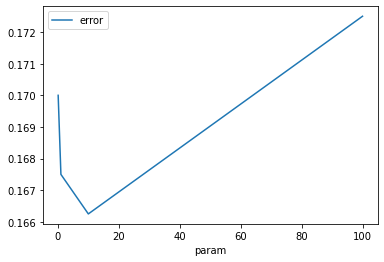

In [89]:
plot_df = pd.DataFrame({'error': 1-clf.cv_results_['mean_test_score'], 'param':params['svc__C']})
plot_df.plot(y='error', x='param')

In [90]:
"""
1sde rule best C = 1 with error of  1-0.8325
"""

'\n1sde rule best C = 1 with error of  1-0.8325\n'

In [91]:
#e

In [92]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(C=1, kernel = 'linear'))])
pipe.fit(X_train,y_train)

test_pred = pipe.predict(X_test)
print('test error: ')
print(1-np.sum(test_pred==y_test)/len(y_test))

train_pred = pipe.predict(X_train)
print('train error: ')
print(1-np.sum(train_pred==y_train)/len(y_train))

test error: 
0.17407407407407405
train error: 
0.16000000000000003


In [93]:
#f

In [94]:
"""
A smaller value of γ means 1/γ is larger since γ>0. So if sigma is larger this means
we allow for more influence of a single training example on the separating hyperplane. 

sklearn says:
When gamma is very small, the model is too constrained and cannot capture the complexity shape
of the data. The region of influence of any selected support vector would include the whole training set.
The resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers 
of high density of any pair of two classes.
"""

'\nA smaller value of γ means 1/γ is larger since γ>0. So if sigma is larger this means\nwe allow for more influence of a single training example on the separating hyperplane. \n\nsklearn says:\nWhen gamma is very small, the model is too constrained and cannot capture the complexity shape\nof the data. The region of influence of any selected support vector would include the whole training set.\nThe resulting model will behave similarly to a linear model with a set of hyperplanes that separate the centers \nof high density of any pair of two classes.\n'

In [95]:
#g

In [96]:
gamma_range = np.logspace(-9, 3, 13)

In [97]:
#pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(C=0.01, kernel = 'linear'))])
params={'svc__gamma': gamma_range ,
        }
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf'))])

clf = GridSearchCV(estimator=pipe, 
                   param_grid=params,
                   cv=5,scoring='accuracy',
                  n_jobs=6)
clf.fit(X_train, y_train)
clf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             n_jobs=6,
             param_grid={'svc__gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='accuracy')

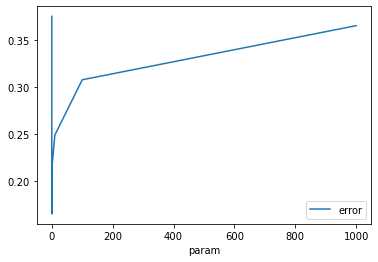

In [98]:
plot_df = pd.DataFrame({'error': 1-clf.cv_results_['mean_test_score'], 'param':params['svc__gamma']})
plot_df.plot(y='error', x='param')

In [99]:
clf.cv_results_

{'mean_fit_time': array([0.0408916 , 0.06072607, 0.06666045, 0.05780959, 0.0606751 ,
        0.06082087, 0.05781622, 0.05326142, 0.04869509, 0.06006608,
        0.09114537, 0.08894176, 0.07550154]),
 'std_fit_time': array([0.00650292, 0.02071042, 0.01176404, 0.0032147 , 0.00563451,
        0.00695975, 0.00367332, 0.00592596, 0.00411821, 0.00791813,
        0.00602882, 0.00774645, 0.00480985]),
 'mean_score_time': array([0.02413268, 0.03811364, 0.03467798, 0.03851089, 0.03695903,
        0.03601298, 0.03112516, 0.02701182, 0.02961597, 0.03194418,
        0.03850994, 0.0479176 , 0.03417673]),
 'std_score_time': array([0.00386977, 0.01424046, 0.00489283, 0.00698479, 0.00571949,
        0.00349223, 0.00474857, 0.00754928, 0.00437747, 0.00772746,
        0.00548794, 0.00529013, 0.00445311]),
 'param_svc__gamma': masked_array(data=[1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                    0.1, 1.0, 10.0, 100.0, 1000.0],
              mask=[False, False, False, False, False,

In [100]:
"""
1sde rule best gamma   {'svc__gamma': 0.001}, of with error of 1-0.79625
"""

"\n1sde rule best gamma   {'svc__gamma': 0.001}, of with error of 1-0.79625\n"

In [101]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(gamma=0.001, kernel = 'rbf'))])
pipe.fit(X_train,y_train)

test_pred = pipe.predict(X_test)
print('test error: ')
print(1-np.sum(test_pred==y_test)/len(y_test))

train_pred = pipe.predict(X_train)
print('train error: ')
print(1-np.sum(train_pred==y_train)/len(y_train))

test error: 
0.1777777777777778
train error: 
0.18125000000000002


In [102]:
#h

In [103]:
gamma_range = [0.1, 1, 10]
params={'svc__gamma': gamma_range ,
        }
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(degree=2, kernel = 'poly'))])

clf = GridSearchCV(estimator=pipe, 
                   param_grid=params,
                   cv=5,scoring='accuracy',
                  n_jobs=10)
clf.fit(X_train, y_train)
clf

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(degree=2, kernel='poly'))]),
             n_jobs=10, param_grid={'svc__gamma': [0.1, 1, 10]},
             scoring='accuracy')

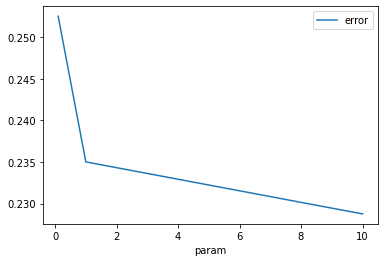

In [104]:
plot_df = pd.DataFrame({'error': 1-clf.cv_results_['mean_test_score'], 'param':params['svc__gamma']})
plot_df.plot(y='error', x='param')

In [105]:
clf.cv_results_

{'mean_fit_time': array([4.72929955e-02, 9.84262657e-01, 4.74563861e+01]),
 'std_fit_time': array([0.00977379, 0.16064348, 7.48700912]),
 'mean_score_time': array([0.02917109, 0.01940141, 0.00496664]),
 'std_score_time': array([0.01143758, 0.01091568, 0.00124391]),
 'param_svc__gamma': masked_array(data=[0.1, 1, 10],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'svc__gamma': 0.1}, {'svc__gamma': 1}, {'svc__gamma': 10}],
 'split0_test_score': array([0.70625, 0.71875, 0.73125]),
 'split1_test_score': array([0.74375, 0.79375, 0.80625]),
 'split2_test_score': array([0.75 , 0.775, 0.775]),
 'split3_test_score': array([0.75625, 0.75625, 0.78125]),
 'split4_test_score': array([0.78125, 0.78125, 0.7625 ]),
 'mean_test_score': array([0.7475 , 0.765  , 0.77125]),
 'std_test_score': array([0.0242384 , 0.02610077, 0.0245586 ]),
 'rank_test_score': array([3, 2, 1], dtype=int32)}

In [106]:
"""
1sde rule best gamma   1 of with error of 0.765 
Takes too long to run a larger grid
"""

'\n1sde rule best gamma   1 of with error of 0.765 \nTakes too long to run a larger grid\n'

In [107]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(gamma=1, degree=2,kernel = 'poly'))])
pipe.fit(X_train,y_train)

test_pred = pipe.predict(X_test)
print('test error: ')
print(1-np.sum(test_pred==y_test)/len(y_test))

train_pred = pipe.predict(X_train)
print('train error: ')
print(1-np.sum(train_pred==y_train)/len(y_train))

test error: 
0.20740740740740737
train error: 
0.18000000000000005


In [108]:
#i

In [109]:
"""
Linear model with C = 1 does the best on test data given this split. But it seems fairly close. 
"""

'\nLinear model with C = 1 does the best on test data given this split. But it seems fairly close. \n'

In [110]:
#Extra Credit

In [111]:
"""
a. Describe the structure of the network. How many layers does this network have? What are
the sizes of the layers? What activation function(s) are being used?

1 input layer
7 hidden fc layers
1 output regression layer with 3 targets (rgb)

activation is all relu (rectified linear unit)

layer_defs = [];
layer_defs.push({type:'input', out_sx:1, out_sy:1, out_depth:2}); // 2 inputs: x, y 
layer_defs.push({type:'fc', num_neurons:20, activation:'relu'});
layer_defs.push({type:'fc', num_neurons:20, activation:'relu'});
layer_defs.push({type:'fc', num_neurons:20, activation:'relu'});
layer_defs.push({type:'fc', num_neurons:20, activation:'relu'});
layer_defs.push({type:'fc', num_neurons:20, activation:'relu'});
layer_defs.push({type:'fc', num_neurons:20, activation:'relu'});
layer_defs.push({type:'fc', num_neurons:20, activation:'relu'});
layer_defs.push({type:'regression', num_neurons:3}); // 3 outputs: r,g,b 

net = new convnetjs.Net();
net.makeLayers(layer_defs);

trainer = new convnetjs.SGDTrainer(net, {learning_rate:0.01, momentum:0.9, batch_size:5, l2_decay:0.0});

"""

"\na. Describe the structure of the network. How many layers does this network have? What are\nthe sizes of the layers? What activation function(s) are being used?\n\n1 input layer\n7 hidden fc layers\n1 output regression layer with 3 targets (rgb)\n\nactivation is all relu (rectified linear unit)\n\nlayer_defs = [];\nlayer_defs.push({type:'input', out_sx:1, out_sy:1, out_depth:2}); // 2 inputs: x, y \nlayer_defs.push({type:'fc', num_neurons:20, activation:'relu'});\nlayer_defs.push({type:'fc', num_neurons:20, activation:'relu'});\nlayer_defs.push({type:'fc', num_neurons:20, activation:'relu'});\nlayer_defs.push({type:'fc', num_neurons:20, activation:'relu'});\nlayer_defs.push({type:'fc', num_neurons:20, activation:'relu'});\nlayer_defs.push({type:'fc', num_neurons:20, activation:'relu'});\nlayer_defs.push({type:'fc', num_neurons:20, activation:'relu'});\nlayer_defs.push({type:'regression', num_neurons:3}); // 3 outputs: r,g,b \n\nnet = new convnetjs.Net();\nnet.makeLayers(layer_defs);

In [112]:
"""
b. What does “Loss” mean here? What is the actual loss function? You may need to consult the
source code ( https://cs.stanford.edu/people/karpathy/convnetjs/docs.html ).

Looks like MSE (L2 regression layer) for the loss function

Loss layers: L2 Regression Layer
Create a regression layer which takes a list of targets (arbitrary numbers, not necessarily a single discrete class label as in softmax/svm) and backprops the L2 Loss. With this, the outputs of your neural net can be arbitrary floating point numbers. In this example we are declaring that we will be predicting 3 numbers as outputs of the net.
1
2
// train 3 real-valued outputs
layer_defs.push({type:'regression', num_neurons: 3});
When you are training a regression layer, you must pass the trainer a list of target values.
"""

"\nb. What does “Loss” mean here? What is the actual loss function? You may need to consult the\nsource code ( https://cs.stanford.edu/people/karpathy/convnetjs/docs.html ).\n\nLooks like MSE (L2 regression layer) for the loss function\n\nLoss layers: L2 Regression Layer\nCreate a regression layer which takes a list of targets (arbitrary numbers, not necessarily a single discrete class label as in softmax/svm) and backprops the L2 Loss. With this, the outputs of your neural net can be arbitrary floating point numbers. In this example we are declaring that we will be predicting 3 numbers as outputs of the net.\n1\n2\n// train 3 real-valued outputs\nlayer_defs.push({type:'regression', num_neurons: 3});\nWhen you are training a regression layer, you must pass the trainer a list of target values.\n"

In [113]:
"""
c. Plot the loss over time, after letting it run for 5,000 iterations. You can do this by watching the
training and manually writing down the loss every 500 or so iterations. How good does the
network eventually get?

Seems to slow down considerably around MSE 0.0041 with 150000  iterations with 0.01 lr. 

loss: 0.02
num_iter: 200

0.01
500


0.009
1000

0.008
1500

0.007
2000

0.0067
2500

0.0063
3000

0.0058
3500

0.0055
4000

0.0054
4500

0.0052
5000

0.0049
6000

0.0048
7000

0.0043
10000

0.0041
150000

"""

'\nc. Plot the loss over time, after letting it run for 5,000 iterations. You can do this by watching the\ntraining and manually writing down the loss every 500 or so iterations. How good does the\nnetwork eventually get?\n\nSeems to slow down considerably around MSE 0.0041 with 150000  iterations with 0.01 lr. \n\nloss: 0.02\nnum_iter: 200\n\n0.01\n500\n\n\n0.009\n1000\n\n0.008\n1500\n\n0.007\n2000\n\n0.0067\n2500\n\n0.0063\n3000\n\n0.0058\n3500\n\n0.0055\n4000\n\n0.0054\n4500\n\n0.0052\n5000\n\n0.0049\n6000\n\n0.0048\n7000\n\n0.0043\n10000\n\n0.0041\n150000\n\n'

In [114]:
"""
d. Can you make the network converge to a lower loss function by lowering the learning rate
every 1,000 iterations? Some learning rate schedules, for example, halve the learning rate
every n iterations: does this technique let the network converge to a lower training loss?

Yes. Lowering learning rate on a schedule when loss decreases slow down help. 
Everything 1000 and halfing might be too much, but some schedule is useful. 
You can also try cosine annealing. 

I obtained a loss of 0.002 by manually changing loss over time.


"""

'\nd. Can you make the network converge to a lower loss function by lowering the learning rate\nevery 1,000 iterations? Some learning rate schedules, for example, halve the learning rate\nevery n iterations: does this technique let the network converge to a lower training loss?\n\nYes. Lowering learning rate on a schedule when loss decreases slow down help. \nEverything 1000 and halfing might be too much, but some schedule is useful. \nYou can also try cosine annealing. \n\nI obtained a loss of 0.002 by manually changing loss over time.\n\n\n'

In [115]:
#Written Exercices

In [116]:
#1

In [117]:
#a

In [118]:
"""
Replacing a branch with the label of the majority class leads to an error rate of  min{r, 1−r }
where r majority class count / total count.

So if you have a feature [0,0,0,1,1,1]
with target [0,1,0, 1,0,1]
Then split on feature means you predict
[0,0,0,1,1,1]
which is the majority class based upon the feature binary split. 

Replacement by the mode class will be the minimum training error a binary classifier can get for that branch.

"""

'\nReplacing a branch with the label of the majority class leads to an error rate of  min{r, 1−r }\nwhere r majority class count / total count.\n\nSo if you have a feature [0,0,0,1,1,1]\nwith target [0,1,0, 1,0,1]\nThen split on feature means you predict\n[0,0,0,1,1,1]\nwhich is the majority class based upon the feature binary split. \n\nReplacement by the mode class will be the minimum training error a binary classifier can get for that branch.\n\n'

In [119]:
import pandas as pd
import numpy as np

df = pd.DataFrame()
df['a1'] = [0,1,0,1,0,0,1,1,1,1]
df['a2'] = [0,1,1,0,0,1,1,1,0,1]
df['a3'] = [0,0,0,1,1,0,0,1,0,0]
df['y'] = [1,1,1,0,0,0,0,0,0,0]
df

,a1,a2,a3,y
0,0,0,0,1
1,1,1,0,1
2,0,1,0,1
3,1,0,1,0
4,0,0,1,0
5,0,1,0,0
6,1,1,0,0
7,1,1,1,0
8,1,0,0,0
9,1,1,0,0


In [120]:
#b

[Text(209.25, 190.26, 'X[2] <= 0.5\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(167.4, 135.9, 'X[0] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(83.7, 81.53999999999999, 'X[1] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(41.85, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(251.10000000000002, 81.53999999999999, 'X[1] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(209.25, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(292.95, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(251.10000000000002, 135.9, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]')]

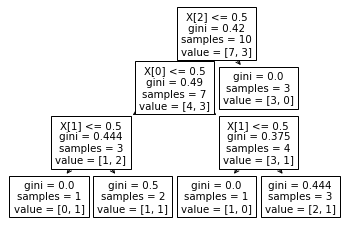

In [121]:
# if you split on a1

"""
With a1 = 0, you have two + target, and two - target
With a1 = 1, you have one + target, and five - target
MEI using mode rule a1 = 1, predict -  (so a1=0 predict +) 
weighted_impurity = 4*(2/4) + 6*(1/6) = 2+1 = 3

With a2 = 0, you have one + target, and three - target
With a2 = 1, you have two + target, and four - target
MEI using mode rule a2 = 0, predict -  (so a2=1 predict -) 
weighted_impurity = 4*(1/4) + 6*(2/6) = 1+2 = 3


With a3 = 0, you have three + target, and four - target
With a3 = 1, you have zero + target, and three - target
MEI using mode rule a3 = 0, predict +  (so a3=1 predict -) 
weighted_impurity = 7*(0/7) + 3*(0/3) = 0

So you would split on feature a3 using min-error impurity. 




Gini splits on a3 with features value <= 0.5


"""

X = df[['a1','a2','a3']].values
y = df['y'].values

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#regr = RandomForestRegressor(n_estimators=1, max_depth=2,
#                                 random_state=0, n_jobs=6)
#regr.fit(X_sampled, y_sampled)

#single_tree = regr.estimators_[0]
clf = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, random_state=0)
clf.fit(X,y)

tree.plot_tree(clf)

In [122]:
#c

In [123]:
"""
If the classes are single cutoff separable on a single feature.
Cases like:
p1 = 0 and p2 = 1
or
p1 = 1 and p2 = 0
"""

'\nIf the classes are single cutoff separable on a single feature.\nCases like:\np1 = 0 and p2 = 1\nor\np1 = 1 and p2 = 0\n'

In [124]:
#d

In [125]:
"""
MEI is not smooth concave unlike entropy and therefore does worse in creating pure nodes at the end of many splits.
MEI may get stuck and unable to create pure leaf nodes in some cases.
Greedy nature hurts when bad moves in the first split is necessary for pure leaf nodes later on.
Better off using entropy/gini vs min-error to split on
"""

'\nMEI is not smooth concave unlike entropy and therefore does worse in creating pure nodes at the end of many splits.\nMEI may get stuck and unable to create pure leaf nodes in some cases.\nGreedy nature hurts when bad moves in the first split is necessary for pure leaf nodes later on.\nBetter off using entropy/gini vs min-error to split on\n'

In [126]:
#2

In [127]:
#a

In [128]:
import pandas as pd
import numpy as np
from sklearn import svm
np.random.seed(1)

In [129]:
df = pd.DataFrame()
df['X1'] = [3,2,4,1,2,4,4]
df['X2'] = [4,2,4,4,1,3,1]
df['Y'] = [0,0,0,0,1,1,1]
df

,X1,X2,Y
0,3,4,0
1,2,2,0
2,4,4,0
3,1,4,0
4,2,1,1
5,4,3,1
6,4,1,1


In [135]:
# https://scikit-learn.org/0.24/auto_examples/svm/plot_linearsvc_support_vectors.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

#X, y = make_blobs(n_samples=40, centers=2, random_state=0)
X = df[['X1','X2']].values
y = df['Y'].values

plt.figure(figsize=(10, 5))

# make C large until coef do not change to get max margin
clf = LinearSVC(C=100000, loss="hinge", random_state=42).fit(X, y)

# obtain the support vectors through the decision function
decision_function = clf.decision_function(X)
# we can also calculate the decision function manually
# decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
# The support vectors are the samples that lie within the margin
# boundaries, whose size is conventionally constrained to 1


<Figure size 720x360 with 0 Axes>

In [136]:
decision_function

array([-2.99993464, -0.9999417 , -1.        , -6.99980392,  1.00002209,
        0.99996379,  4.99989137])

In [137]:
clf.coef_[0]

array([ 1.99993464, -1.99996379])

In [138]:
clf.intercept_[0]

-0.9998834027482376

In [140]:
#a

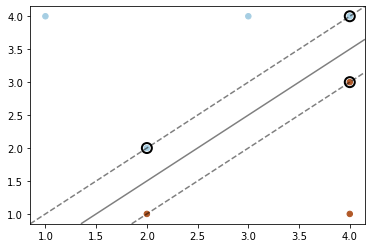

In [141]:
clf = svm.SVC(kernel="linear", C=10000000).fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)

# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=2,
    facecolors="none",
    edgecolors="k",
)

plt.show()

#plt.tight_layout()
#plt.show()

In [142]:
#b

In [143]:
"""
Classify as Red if 
-1 + 2*X1 - 2*X2 < 0 
or classify as Blue overwise

so the first data point -1 + 2*3 + -2*4 = -3 which is less than 0 so classify as Red
the last data point -1 + 2*4 + -2*1 = 5 which is greater than 0 so classify as Blue
"""

'\nClassify as Red if \n-1 + 2*X1 - 2*X2 < 0 \nor classify as Blue overwise\n\nso the first data point -1 + 2*3 + -2*4 = -3 which is less than 0 so classify as Red\nthe last data point -1 + 2*4 + -2*1 = 5 which is greater than 0 so classify as Blue\n'

In [144]:
#c

In [145]:
"""
On the sketch the margin is between the two dotted lines (with a solid line in the middle). 
"""

'\nOn the sketch the margin is between the two dotted lines (with a solid line in the middle). \n'

In [146]:
#d

In [147]:
"""
The support vectors are circled.
The three listed are 
array([[2., 2.],
       [4., 4.],
       [4., 3.]])
But [2,1] while not computed as a SV, visually appears to be on the margin.
"""

clf.support_vectors_

array([[2., 2.],
       [4., 4.],
       [4., 3.]])

In [148]:
#e

In [149]:
"""
Small movements wouldn't make this into a XOR problem. It also isn't a support vector.
Also shown empirically
"""

"\nSmall movements wouldn't make this into a XOR problem. It also isn't a support vector.\nAlso shown empirically\n"

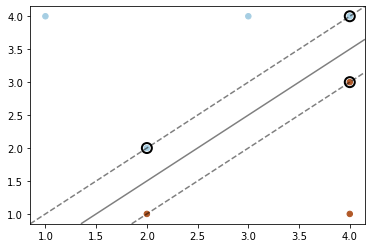

In [150]:
# slightly change this last data point
X[6,0] = 1.1*X[6,0]
X[6,1] = 1.1*X[6,1]
clf = svm.SVC(kernel="linear", C=10000000).fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)

# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=2,
    facecolors="none",
    edgecolors="k",
)

plt.show()

#plt.tight_layout()
#plt.show()

In [151]:
#f

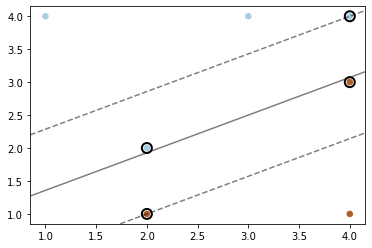

In [152]:
df = pd.DataFrame()
df['X1'] = [3,2,4,1,2,4,4]
df['X2'] = [4,2,4,4,1,3,1]
df['Y'] = [0,0,0,0,1,1,1]
clf = svm.SVC(kernel="linear", C=1).fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)

# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=2,
    facecolors="none",
    edgecolors="k",
)

plt.show()

#plt.tight_layout()
#plt.show()

In [153]:
clf.coef_[0]

array([ 0.61538462, -1.07692308])

In [154]:
clf.intercept_[0]

0.8461538461538496

In [155]:
"""
Classify Red
0.8461538461538496 + 0.61*X1 + -1.07*X2 < 0
else Blue
"""

'\nClassify Red\n0.8461538461538496 + 0.61*X1 + -1.07*X2 < 0\nelse Blue\n'

In [156]:
clf.predict(X)

array([0, 0, 0, 0, 1, 1, 1])

In [157]:
clf.decision_function(X)

array([-1.61538462, -0.07692308, -1.        , -2.84615385,  1.        ,
        0.07692308,  2.23076923])

In [158]:
#g

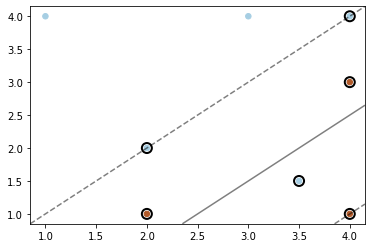

In [159]:
# Draw another data point to make this XOR problem - not linearly separable
X = np.vstack((X,[3.5,1.5]))
y = np.hstack((y,0))

clf = svm.SVC(kernel="linear", C=10000000).fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)

# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=2,
    facecolors="none",
    edgecolors="k",
)

plt.show()

#plt.tight_layout()
#plt.show()

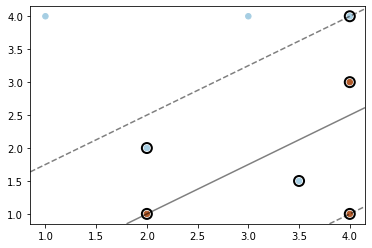

In [160]:
# XOR problem, so not linearly sep. regardless of parameters if linear
clf = svm.SVC(kernel="linear", C=1).fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
)

# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=2,
    facecolors="none",
    edgecolors="k",
)

plt.show()

#plt.tight_layout()
#plt.show()